In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap

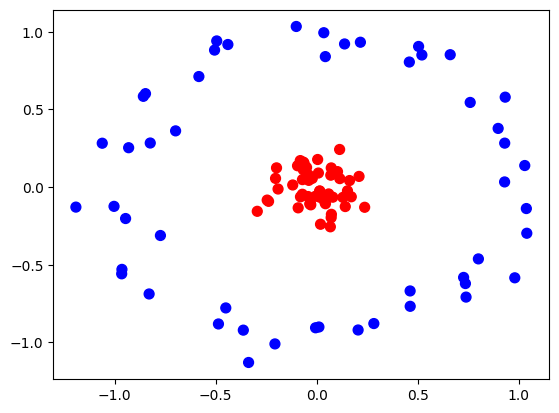

In [ ]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='bwr')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [ ]:
classifier = SVC(kernel="linear")
classifier.fit(X_train, y_train.ravel())
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.65

In [ ]:
zero_one_colourmap = ListedColormap(('blue', 'red'))
def plot_decision_boundary(X, y, clf):
    X_set, y_set = X, y
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                                 stop = X_set[:, 0].max() + 1,
                                 step = 0.01),
                       np.arange(start = X_set[:, 1].min() - 1,
                                 stop = X_set[:, 1].max() + 1,
                                 step = 0.01))

    plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(),
                                             X2.ravel()]).T).reshape(X1.shape),
               alpha = 0.75,
               cmap = zero_one_colourmap)
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = (zero_one_colourmap)(i), label = j)
    plt.title('SVM Decision Boundary')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    return plt.show()

/tmp/ipython-input-3603277588.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


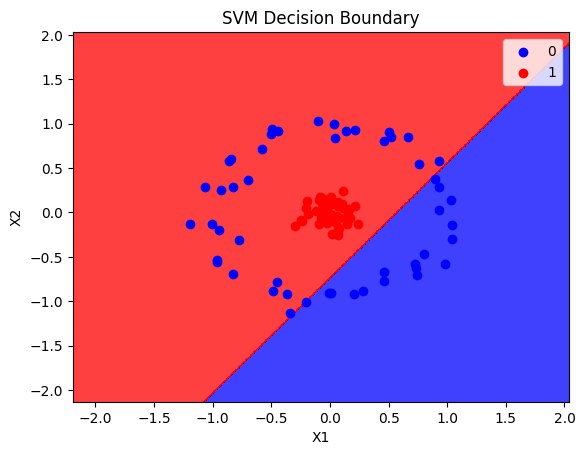

In [ ]:
plot_decision_boundary(X, y, classifier)

In [ ]:
def plot_3d_plot(X, y):
    r = np.exp(-(X ** 2).sum(1)) #radial basis function to calculate r for every point
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=100, cmap='bwr') #3d scatter plot
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('y')
    return ax #transforming data into 3d

<Axes3D: xlabel='X1', ylabel='X2', zlabel='y'>

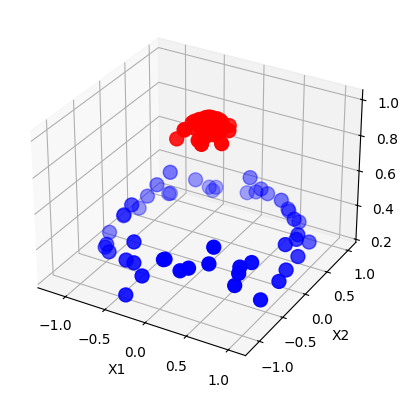

In [ ]:
plot_3d_plot(X,y)

In [ ]:
rbf_classifier = SVC(kernel="rbf")
rbf_classifier.fit(X_train, y_train)
y_pred = rbf_classifier.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

1.0

/tmp/ipython-input-3603277588.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


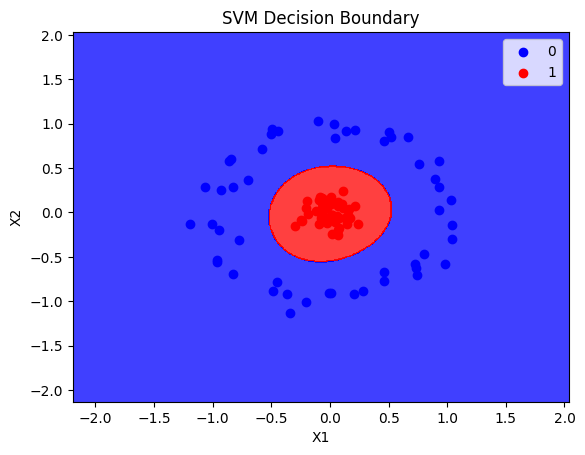

In [ ]:
plot_decision_boundary(X, y, rbf_classifier)

In [ ]:
poly_classifier = SVC(kernel="poly",degree=2)
poly_classifier.fit(X_train, y_train)
y_pred = poly_classifier.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

1.0

/tmp/ipython-input-3603277588.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


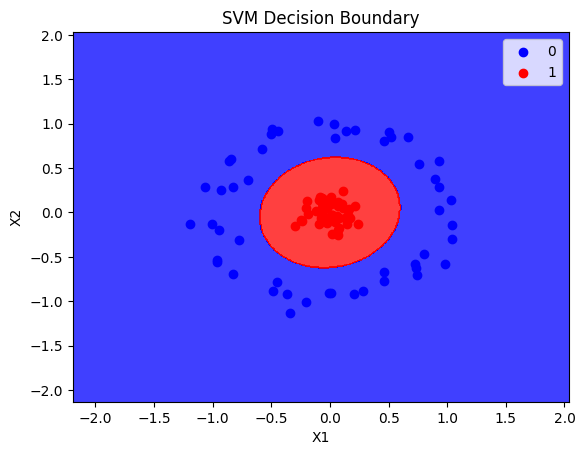

In [ ]:
plot_decision_boundary(X, y, poly_classifier)

In [ ]:
X

array([[ 0.06765532, -0.2560441 ],
       [ 0.11360269,  0.24213819],
       [ 0.7275756 , -0.58211406],
       [-0.45009404, -0.77858099],
       [-0.0948289 ,  0.1372674 ],
       [ 0.1712493 , -0.06262778],
       [-0.85827494,  0.58449053],
       [ 0.20515635, -0.92064376],
       [-0.08129232,  0.17051867],
       [-0.8241848 ,  0.28371979],
       [ 0.28306117, -0.87919868],
       [ 1.03034415,  0.13871288],
       [ 0.04042766, -0.09628794],
       [-0.04285793, -0.06098308],
       [ 1.03824208, -0.13839314],
       [-0.94626535, -0.20270264],
       [-0.2036797 ,  0.05582856],
       [ 0.04352444, -0.10720204],
       [ 0.93106688,  0.28296262],
       [ 0.46303487, -0.7681268 ],
       [ 0.89859175,  0.37777485],
       [-0.11862078,  0.01343221],
       [-0.50565624,  0.88231548],
       [ 0.07280224, -0.17560042],
       [-1.06185436,  0.28237508],
       [-0.19885243,  0.12370977],
       [ 0.0721541 ,  0.12336505],
       [-0.33722273, -1.12994789],
       [-0.43971162,

In [ ]:
np.exp(-(X**2)).sum(1) #this is z cordinate values

array([1.9319774 , 1.93023213, 1.30156262, 1.36204324, 1.97238186,
       1.96718496, 1.18933335, 1.38723274, 1.96475539, 1.42963934,
       1.38463281, 1.32684146, 1.98913842, 1.99445285, 1.32132315,
       1.36818111, 1.95625135, 1.98668092, 1.34331212, 1.36134134,
       1.3129884 , 1.98584723, 1.2334864 , 1.96434891, 1.24719099,
       1.94604171, 1.9797036 , 1.17144196, 1.25452575, 1.33283658,
       1.98782819, 1.24876521, 1.99545987, 1.99284466, 1.33291096,
       1.98401728, 1.99274554, 1.30406667, 1.99915326, 1.9966087 ,
       1.49100474, 1.99655667, 1.93637693, 1.92829267, 1.98966668,
       1.1247249 , 1.35799556, 1.33392023, 1.97238182, 1.9346887 ,
       1.99179616, 1.14941206, 1.12538608, 1.09258382, 1.12921996,
       1.49172148, 1.18357015, 1.30397235, 1.31398642, 1.98941279,
       1.9701775 , 1.21539401, 1.99905582, 1.95687662, 1.37089275,
       1.96392448, 1.94383683, 1.96454138, 1.98931202, 1.98611554,
       1.99453628, 1.31845844, 1.24722705, 1.4397001 , 1.98165

In [ ]:
X_new=np.exp(-(X**2))

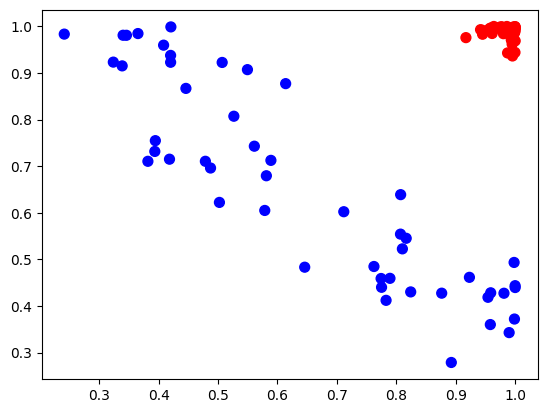

In [ ]:
plt.scatter(X_new[:, 0], X_new[:, 1], c=y, s=50, cmap='bwr') #transformation in 2d